In [1]:
import os 

path = "Data"
files = os.listdir(path)

# LOAD TRANSCRIPTION DATA FROM TEXT FILES

In [2]:
import time 

def isTimeFormat(input):
    try:
        if len(input.split(':')) == 2:
            time.strptime(input, '%M:%S')
        else:
            time.strptime(input, '%H:%M:%S')
        return True
    except ValueError:
        return False
    
    
def process_text(text):
    processed_text = []

    for i, line in enumerate(text):
        if len(line.split()) > 1:
            name = line.split()[0]
            timestamp = line.split()[1]

            if name == 'Brady' and isTimeFormat(timestamp):
                processed_text.append('[Brady] ' + text[i+1])

            if name == 'Grey' and isTimeFormat(timestamp):
                    processed_text.append('[Grey] ' + text[i+1])   
                    
    return processed_text


def get_text(path):
    text = []

    with open(path, "r") as f:
        for line in f:
            if len(line.strip()) > 0:
                text.append(line.strip())
                
    processed_text = process_text(text)
    
    return processed_text

In [3]:
data_dict = {}

for file in os.listdir(path):
    name = file.split('_otter')[0]
    text = get_text(path + '/' + file)
    data_dict[name] = text

In [9]:
for key in data_dict:
    with open("big_hi_text.txt", "a") as f:
        f.write("<|startoftext|> \n")
        f.write("Title - " + str(key) + '\n')
        for line in data_dict[key]:
            f.write(line + '\n')
        f.write("<|endoftext|> \n")

In [4]:
data_dict.keys()

dict_keys(['101', '1020Two20Dudes20Talking', '103 (1)', '104', '106', '107', '108', '109', '10_Lords_A-leaping', '110', '111', '112', '113', '114', '117', '118', '119', '11', '120', '123', '124', '125', '126', '127', '128', '129', '12', '130', '131', '132', '135', '136FinalFinal', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '33', '34', '35', '36', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '5', '60', '61', '62', '63', '64', '66', '67v2', '69', '6', '70', '7', '80', '82', '83', '8_Maids_A-Milking', '8', '95_oh_god_i_hope_everything_is_ok_because_i_do_not_have_time_to_fix_anything', '97', '9', 'ARecentHelloInternet', 'A_Partridge_in_a_Pear_Tree', 'Eleven_Pipers_Piping', 'Five_Gold_Rings', 'Four_Calling_Birds', 'H.I._Seventy_Five', 'Hello_Internet_Episode_One_Hundred', 'HI115', 'HI121', 'HI122', 'HI134', 'HI201', 'HI20220--20Copyrig

# MEASURING LEXICAL DIVERSITY BETWEEN SPEAKERS

In [5]:
import numpy as np 

def extract_info(text, name):
    print("Name: {0}".format(name))
    print("Sentences: {0}".format(len(text)))      
    print("Avg Words in Sentence: {0}".format(np.mean([len(line.split()) for line in text])))
    
    vocabulary = set([word.lower() for line in text for word in line.split()])
    print("Vocabulary size: {0}".format(len(vocabulary)))
    print("Lexical Diversity: {0}".format(len([word.lower() for line in text for word in line.split()])/len(vocabulary)))

In [6]:
grey_text = []
brady_text = []

for key in data_dict:
    for line in data_dict[key]:
        words = line.split()
        if words[0] == '[Brady]':
            brady_text.append(' '.join(words[1:]))
        if words[0] == '[Grey]':
            grey_text.append(' '.join(words[1:]))    
                 

In [7]:
extract_info(grey_text, 'Grey')

print('')

extract_info(brady_text, 'Brady')

Name: Grey
Sentences: 18111
Avg Words in Sentence: 84.73115785986417
Vocabulary size: 38572
Lexical Diversity: 39.78445504511044

Name: Brady
Sentences: 18066
Avg Words in Sentence: 63.220580095206465
Vocabulary size: 37288
Lexical Diversity: 30.63031001930916


# WORD CLOUD PLOTS

In [8]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

stopwords = set(STOPWORDS)
brady_lines = ' '.join(word.lower() for line in brady_text for word in line.split())
grey_lines = ' '.join(word.lower() for line in grey_text for word in line.split())

brady_wordcloud = WordCloud(width = 800, height = 800, 
                #background_color ='white', 
                stopwords = stopwords, 
                collocations=True,
                min_font_size = 10).generate(brady_lines) 

grey_wordcloud = WordCloud(width = 800, height = 800, 
                #background_color ='white', 
                stopwords = stopwords, 
                collocations=True,
                min_font_size = 10).generate(grey_lines) 

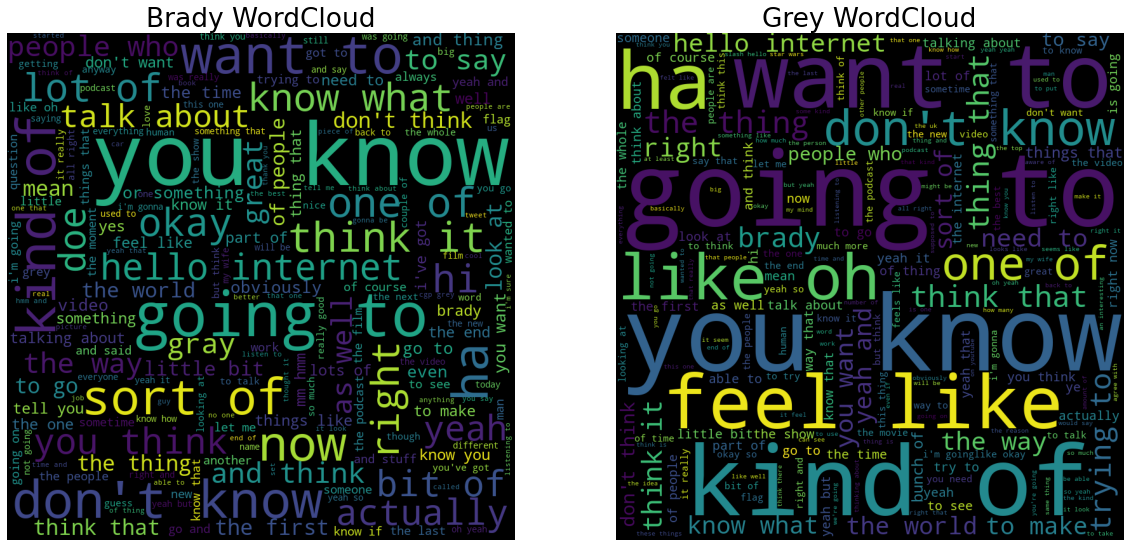

In [9]:
plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20), facecolor=None)

axes[0].imshow(brady_wordcloud)
axes[0].set_title("Brady WordCloud", )
axes[0].axis("off")

axes[1].imshow(grey_wordcloud)
axes[1].set_title("Grey WordCloud")
axes[1].axis("off")
  
plt.show() 

# BRADY AND GREYS FAVOURITE WORDS

In [10]:
from collections import Counter 

def generate_words(lines):
    # get all non stop words
    for line in lines:
        for word in line.split():
            word = word.lower()
            if word not in STOPWORDS:
                yield word
        
brady_wordcount = Counter(generate_words(brady_text))
grey_wordcount = Counter(generate_words(grey_text))

In [11]:
def plot_wordcounts(data, name, fontsize=20, rotation=0):
    n_groups = len(data)

    vals = [x[1] for x in data]
    legends = [x[0] for x in data]

    fig, ax = plt.subplots(figsize=(20,12))

    index = np.arange(n_groups)
    bar_width = 0.25

    opacity = 0.4

    rects1 = plt.bar(index, vals, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Ocurrences')


    plt.xlabel('Occurrences')
    plt.ylabel('Words')
    plt.title(name)
    plt.xticks(index + bar_width, legends, )
    plt.xticks(fontsize=fontsize, rotation=rotation)

    plt.tight_layout()
    plt.show()
    

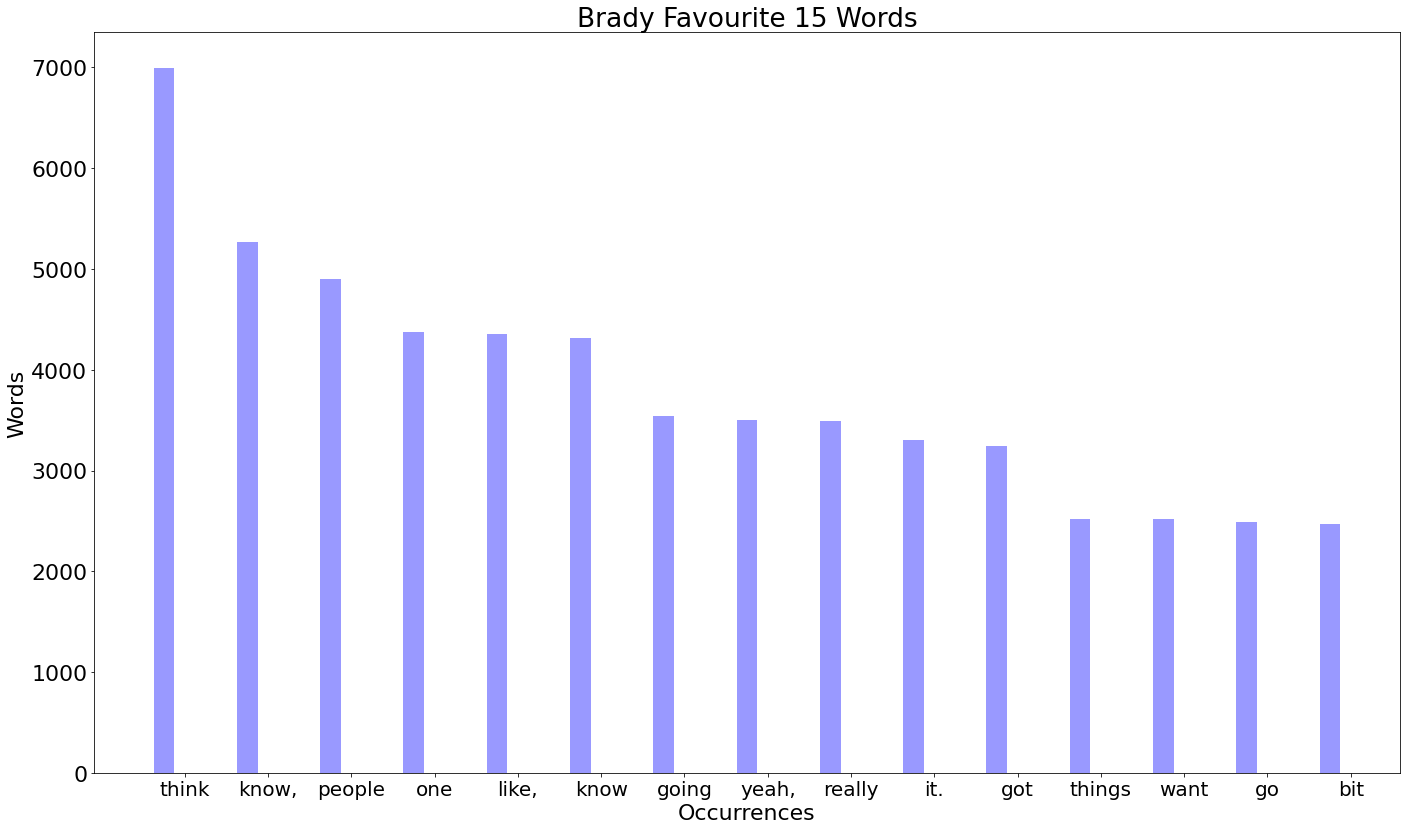

In [12]:
plot_wordcounts(brady_wordcount.most_common()[:15], 'Brady Favourite 15 Words')

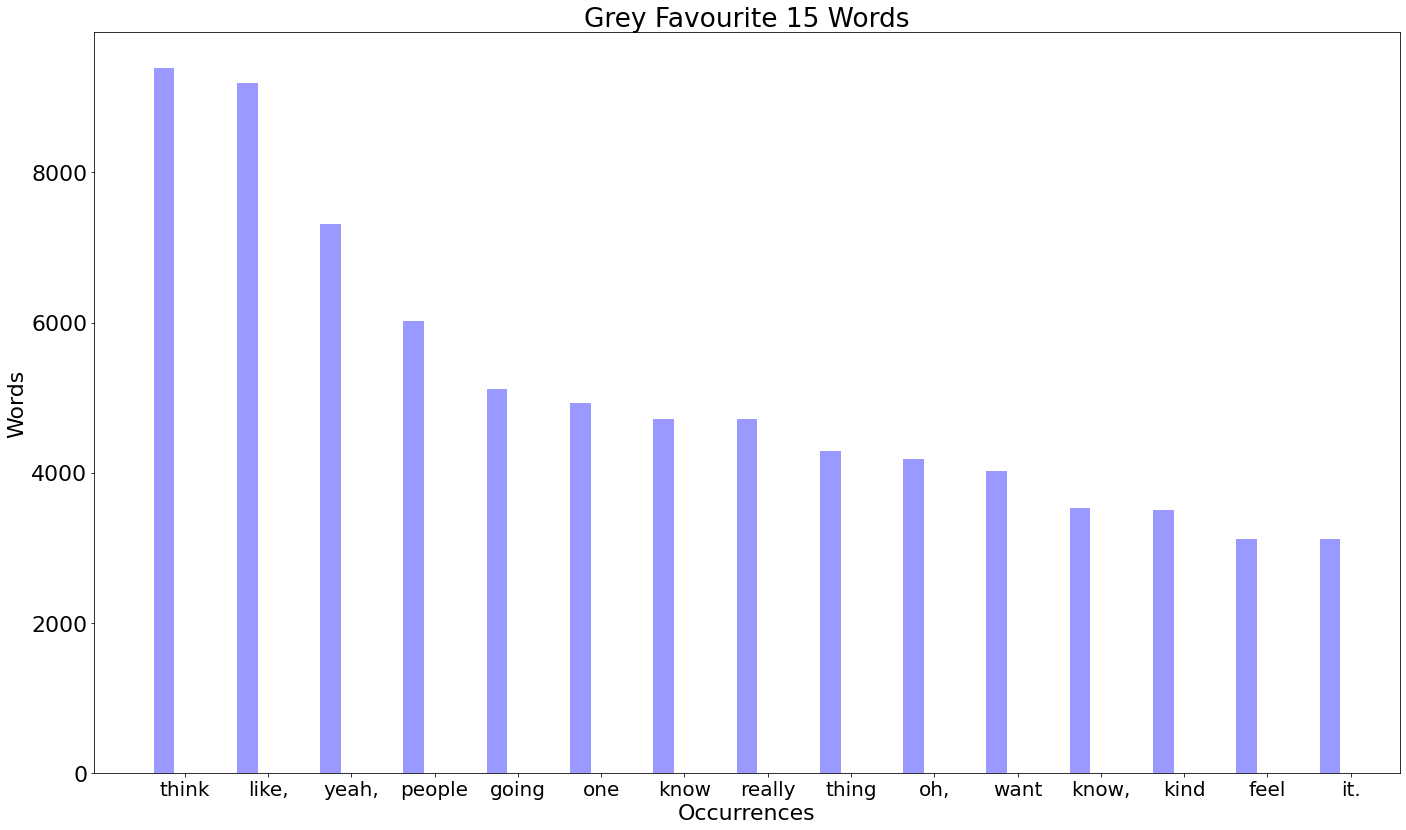

In [13]:
plot_wordcounts(grey_wordcount.most_common()[:15], 'Grey Favourite 15 Words')

# LEXICAL SEMANTIC ANALYSIS
- First process text into sentences and preprocess using stemming, removing stop words etc
- Use Gensim latent dirichlet allocation Models and NLTK
- Note that lemmatizing will change words in an odd way sometimes, for example, Brady -> bradi

In [14]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import PunktSentenceTokenizer as punkt
import string
import nltk
import sys
nltk.download('wordnet')

stemmer = SnowballStemmer('english')
tokenizer = punkt()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess_text(text):
    
    processed_text = []
    for progress, line in enumerate(text):
        # split line into sentences 
        sentences = tokenizer.tokenize(line)
        
        for line in sentences:
            # remove punctuation from line and split into word tokens
            line = line.translate(str.maketrans('', '', string.punctuation)) 
            words = line.split()
            processed_line = []
            
            for token in [w for w in words if w.lower() not in stopwords]:
                # move to lower case and lemmatize
                token = token.lower()
                token = lemmatize_stemming(token)
                processed_line.append(token)
            
            if len(processed_line) > 0:
                processed_text.append(processed_line)
            
        
        sys.stdout.write("\r" + str(progress) + '/' + str(len(text)) + ' Lines Processed: ' + str(len(processed_text)))     
        
    return processed_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Steven\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
brady_processed_text = preprocess_text(brady_text)

18065/18066 Lines Processed: 83747

In [16]:
grey_processed_text = preprocess_text(grey_text)

18110/18111 Lines Processed: 105317

In [18]:
# Create dictionaries and filter down words
from gensim.utils import simple_preprocess
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

brady_dictionary = Dictionary(brady_processed_text)
grey_dictionary = Dictionary(grey_processed_text)

brady_dictionary.filter_extremes(no_below=15, keep_n=100000)
grey_dictionary.filter_extremes(no_below=15, keep_n=100000)

In [19]:
brady_bow_corpus = [brady_dictionary.doc2bow(doc) for doc in brady_processed_text]
grey_bow_corpus = [grey_dictionary.doc2bow(doc) for doc in grey_processed_text]

## Splitting the sentences is is probably not a good idea and causes weird topics to appear
## But processing the sentences in this way will be better for the next part

In [20]:
from gensim.models import LdaMulticore

brady_lda_model = LdaMulticore(brady_bow_corpus, num_topics=10, id2word=brady_dictionary, passes=2, workers=6)

In [21]:
grey_lda_model = LdaMulticore(grey_bow_corpus, num_topics=10, id2word=grey_dictionary, passes=2, workers=6)

In [22]:
print("Brady's favourite topics")
print("")
for idx, topic in brady_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print("")

Brady's favourite topics

Topic: 0 
Words: 0.070*"think" + 0.049*"thing" + 0.030*"ive" + 0.024*"get" + 0.014*"lot" + 0.014*"make" + 0.013*"peopl" + 0.013*"know" + 0.013*"mean" + 0.012*"love"

Topic: 1 
Words: 0.030*"now" + 0.022*"make" + 0.020*"great" + 0.017*"realli" + 0.016*"video" + 0.016*"im" + 0.015*"show" + 0.015*"peopl" + 0.013*"go" + 0.012*"happen"

Topic: 2 
Words: 0.032*"know" + 0.024*"your" + 0.016*"day" + 0.015*"interest" + 0.014*"one" + 0.012*"look" + 0.012*"dont" + 0.011*"think" + 0.010*"find" + 0.010*"say"

Topic: 3 
Words: 0.083*"yeah" + 0.043*"that" + 0.028*"okay" + 0.021*"think" + 0.021*"peopl" + 0.019*"know" + 0.015*"im" + 0.014*"oh" + 0.013*"say" + 0.013*"one"

Topic: 4 
Words: 0.028*"one" + 0.025*"go" + 0.024*"think" + 0.019*"that" + 0.017*"look" + 0.014*"grey" + 0.013*"theyr" + 0.012*"call" + 0.011*"sort" + 0.010*"kind"

Topic: 5 
Words: 0.069*"im" + 0.034*"want" + 0.026*"dont" + 0.024*"gonna" + 0.020*"hmm" + 0.013*"go" + 0.012*"look" + 0.011*"think" + 0.011*"peop

In [23]:
print("Grey's favourite topics")
print("")
for idx, topic in grey_lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print("")

Grey's favourite topics

Topic: 0 
Words: 0.073*"im" + 0.071*"that" + 0.032*"go" + 0.019*"gonna" + 0.019*"know" + 0.018*"feel" + 0.014*"good" + 0.012*"oh" + 0.012*"time" + 0.012*"say"

Topic: 1 
Words: 0.091*"think" + 0.026*"realli" + 0.025*"your" + 0.014*"thing" + 0.014*"kind" + 0.014*"doesnt" + 0.012*"go" + 0.011*"that" + 0.010*"look" + 0.010*"happen"

Topic: 2 
Words: 0.053*"know" + 0.042*"dont" + 0.021*"internet" + 0.021*"go" + 0.018*"hello" + 0.011*"mean" + 0.009*"first" + 0.008*"your" + 0.008*"want" + 0.008*"one"

Topic: 3 
Words: 0.050*"thing" + 0.048*"peopl" + 0.023*"think" + 0.018*"know" + 0.018*"one" + 0.015*"dont" + 0.014*"get" + 0.013*"time" + 0.012*"go" + 0.010*"video"

Topic: 4 
Words: 0.042*"okay" + 0.037*"make" + 0.033*"now" + 0.019*"go" + 0.018*"thing" + 0.018*"say" + 0.017*"oh" + 0.014*"know" + 0.013*"littl" + 0.013*"great"

Topic: 5 
Words: 0.036*"there" + 0.016*"actual" + 0.015*"go" + 0.015*"need" + 0.015*"say" + 0.014*"someth" + 0.013*"feel" + 0.013*"your" + 0.010*

# MOST USED TRIGRAM PHRASES (PHRASES OF LENGTH 3)

In [24]:
from nltk import ngrams

def process_ngrams(text, n=2):
    ngram_text = []
    
    for line in text:
        ngram_line = list(nltk.ngrams(line, n))
        if len(ngram_line) > 0:
            ngram_text.append(ngram_line)
            
    return ngram_text

brady_trigrams = process_ngrams(brady_processed_text, 3)
grey_trigrams = process_ngrams(grey_processed_text, 3)

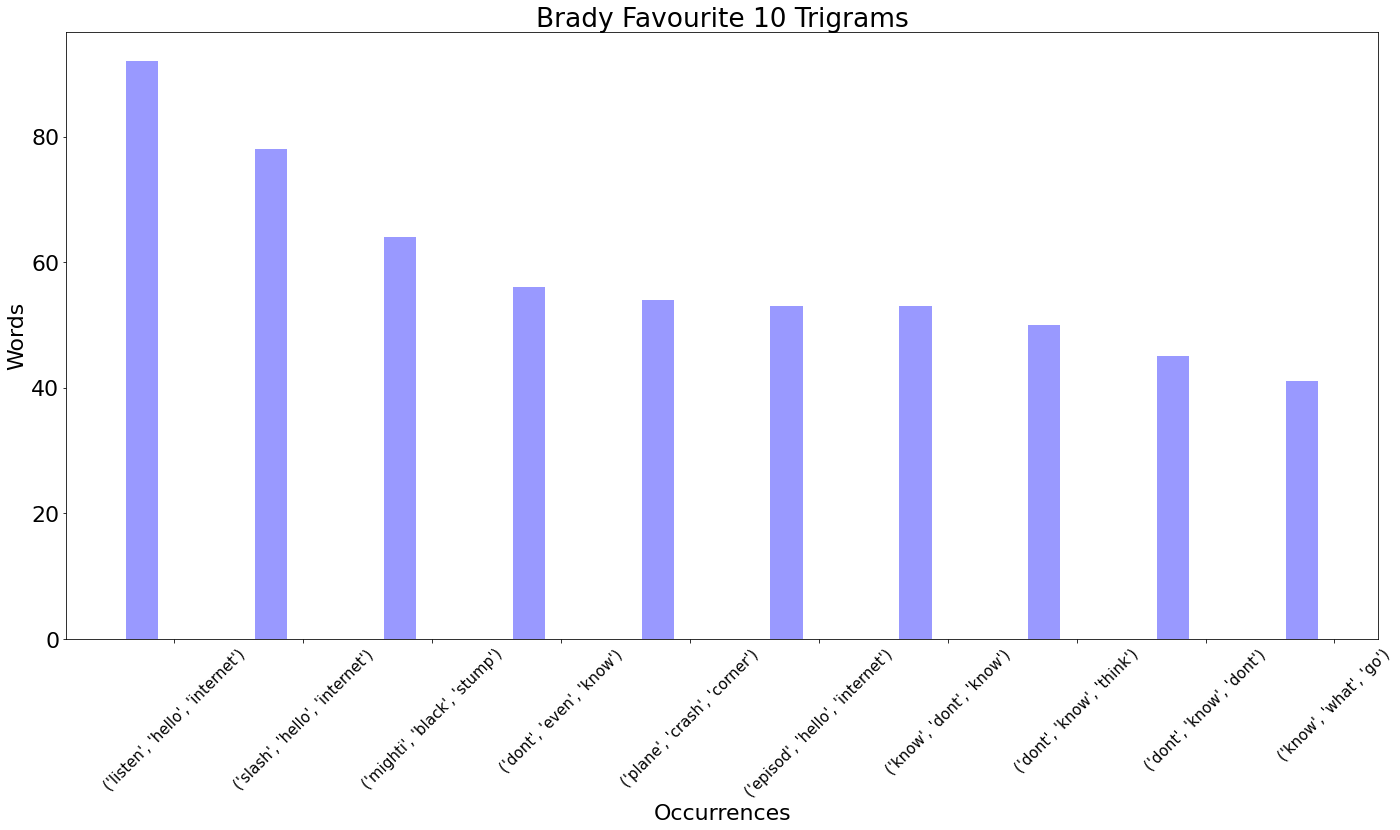

In [25]:
plot_wordcounts(Counter([w for line in brady_trigrams for w in line]).most_common()[:10], 'Brady Favourite 10 Trigrams', fontsize=15, rotation=45)

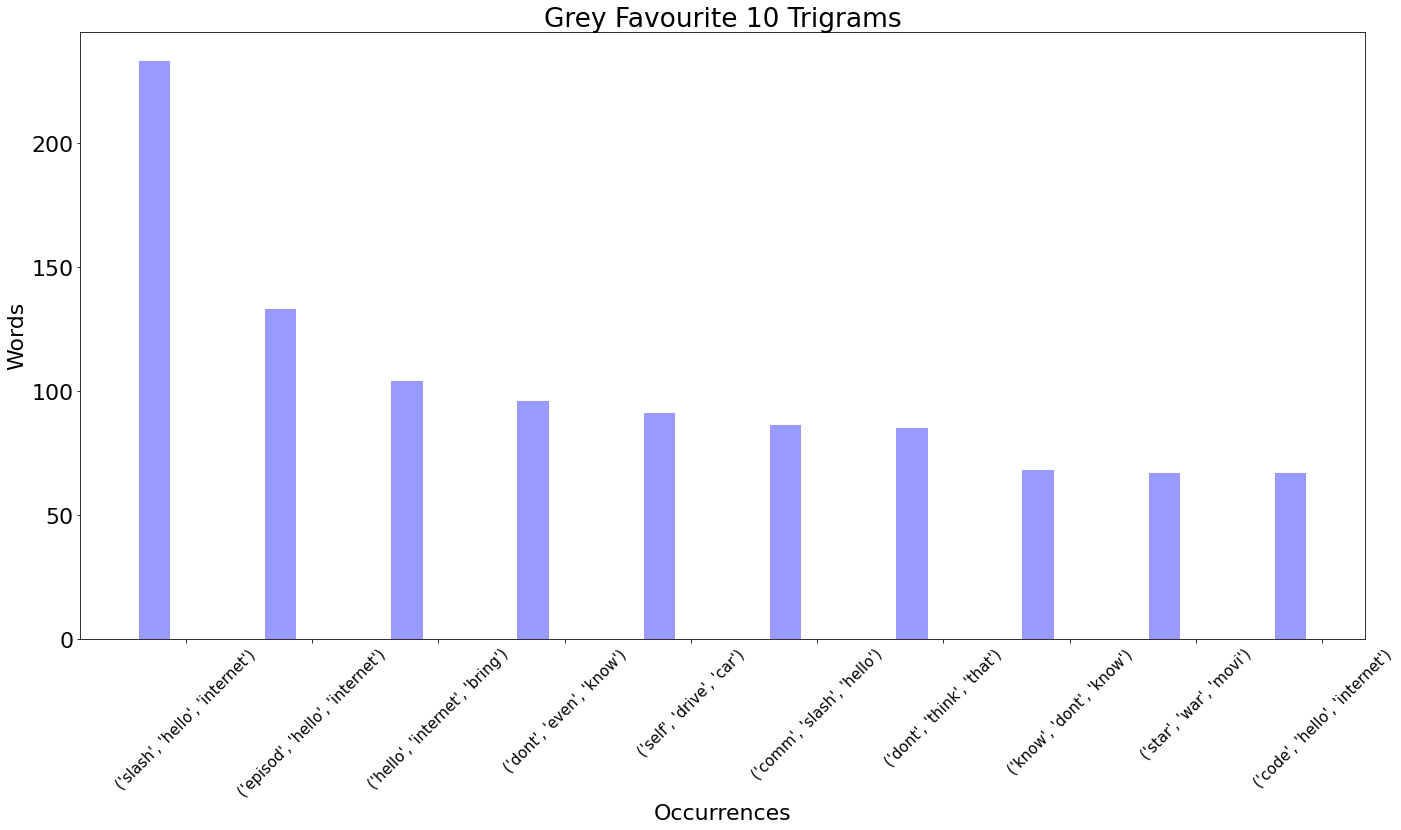

In [26]:
plot_wordcounts(Counter([w for line in grey_trigrams for w in line]).most_common()[:10], 'Grey Favourite 10 Trigrams', fontsize=15, rotation=45)

# BRADY AND GREY WORD2VEC
## The idea is that semantically similar words (words that share similar meaning) should appear in the same context
## We can learn a vector for each, where a large cosine similarity (vectors that are closer together) must share a similar meaning

In [27]:
from gensim.models import Word2Vec

brady_w2v = Word2Vec(brady_processed_text, size=300, window=5, min_count=1, workers=6)

In [28]:
grey_w2v = Word2Vec(grey_processed_text, size=300, window=5, min_count=1, workers=6)

## What words do grey and brady associate with each other?

In [29]:
print('What does Brady think of Grey?')
print("")

most_similar = brady_w2v.wv.most_similar(positive="grey")
    
for m in most_similar:
    print(m[0], ' -> ', m[1])

What does Brady think of Grey?

cgp  ->  0.8490246534347534
bradi  ->  0.8213655948638916
42  ->  0.815665602684021
support  ->  0.8035112023353577
thank  ->  0.7966485023498535
longtim  ->  0.7885168790817261
hci  ->  0.7769911289215088
lookout  ->  0.7739025354385376
narco  ->  0.7716830372810364
fractur  ->  0.7691400051116943


In [30]:
print('What does Grey think of Brady?')
print("")

most_similar = grey_w2v.wv.most_similar(positive="bradi")
    
for m in most_similar:
    print(m[0], ' -> ', m[1])

What does Grey think of Brady?

thoma  ->  0.8562816977500916
500000  ->  0.8544334769248962
plane  ->  0.8497732281684875
susi  ->  0.8201042413711548
gtd  ->  0.813602864742279
ccc  ->  0.8108491897583008
heron  ->  0.805895209312439
dear  ->  0.8028091192245483
although  ->  0.8011837601661682
heartstr  ->  0.7996635437011719


## What do Grey and Brady think of these common phrases? 

In [31]:
phrase1 = "('slash', 'hello', 'internet')"
phrase2 = "('plane', 'crash', 'corner')"
phrase3 = "('mighti', 'black', 'stump')"
phrase4 = "('sport', 'ball', 'corner')"
phrase5 = "('bradi', 'paper', 'cut')"

## We approximate phrase meaning by using an average of the vectors 

In [32]:
def convert_phrase(phrase):
    return ' '.join([p[1:-1] for p in phrase[1:-1].split(', ')])

In [33]:
phrases = [phrase1, phrase2, phrase3, phrase4, phrase5]
phrases = [convert_phrase(p) for p in phrases]

In [34]:
phrases

['slash hello internet',
 'plane crash corner',
 'mighti black stump',
 'sport ball corner',
 'bradi paper cut']

In [35]:
print("Brady Semantics")
print('')
for p in phrases:
    print('Phrase:', p)
    print("")
    
    vector = np.zeros(300)
    
    for w in p.split():
        vector += brady_w2v.wv[w]
        
    vector = vector / len(p)
    
    most_similar = brady_w2v.wv.most_similar(positive=[vector])
    
    for m in most_similar:
        print(m[0], ' -> ', m[1])
    
    print('')
    print('')

Brady Semantics

Phrase: slash hello internet

support  ->  0.9613310098648071
harryscom  ->  0.9507046937942505
slash  ->  0.9470646381378174
ai  ->  0.9452329874038696
code  ->  0.9429125189781189
hovercom  ->  0.9404146075248718
squarespacecom  ->  0.9403663873672485
hoodi  ->  0.9369994401931763
h  ->  0.9323698282241821
hci  ->  0.9310580492019653


Phrase: plane crash corner

crash  ->  0.9826624393463135
plane  ->  0.9778721928596497
corner  ->  0.9493212699890137
767  ->  0.8789809942245483
investig  ->  0.8681252002716064
tenor  ->  0.858919620513916
pilotless  ->  0.8504345417022705
hurtl  ->  0.8465002775192261
fli  ->  0.843364953994751
reef  ->  0.842393159866333


Phrase: mighti black stump

stump  ->  0.9974138736724854
black  ->  0.9860912561416626
mighti  ->  0.9824630618095398
espresso  ->  0.9690861105918884
renown  ->  0.9554056525230408
roam  ->  0.9549592733383179
dah  ->  0.9516769051551819
nail  ->  0.9484664797782898
municip  ->  0.9481461644172668
subdivid  ->

In [36]:
print("Grey Semantics")
print('')
for p in phrases:
    print('Phrase:', p)
    print("")
    
    vector = np.zeros(300)
    
    for w in p.split():
        vector += brady_w2v.wv[w]
        
    vector = vector / len(p)
    
    most_similar = grey_w2v.wv.most_similar(positive=[vector])
    
    for m in most_similar:
        print(m[0], ' -> ', m[1])
    
    print('')
    print('')

Grey Semantics

Phrase: slash hello internet

slash  ->  0.8696442246437073
softwarecom  ->  0.8667671084403992
dji  ->  0.865737795829773
harryscom  ->  0.8648178577423096
kul  ->  0.8645015954971313
comm  ->  0.8638746738433838
enter  ->  0.8623618483543396
audiblecom  ->  0.8619046211242676
promo  ->  0.8609787225723267
h  ->  0.8596445918083191


Phrase: plane crash corner

crash  ->  0.652022123336792
bishop  ->  0.6310967206954956
shaggi  ->  0.6309070587158203
stair  ->  0.6304466724395752
fli  ->  0.6262997388839722
readi  ->  0.6262778043746948
plane  ->  0.625963568687439
midair  ->  0.6235820651054382
silveri  ->  0.6230864524841309
saturday  ->  0.6223745346069336


Phrase: mighti black stump

onlook  ->  0.7111318111419678
dot  ->  0.7061458826065063
retrac  ->  0.6998931169509888
pillow  ->  0.6962183713912964
gps  ->  0.6958286166191101
deliv  ->  0.695683479309082
rr  ->  0.6945359706878662
dime  ->  0.693758487701416
cream  ->  0.6929850578308105
relentless  ->  0.6921

In [107]:
lexicon = ['sport', 'ball', 'corner', 'hello', 'internet', 'grey', 'bradi', 'mighti', 'black', 'stump', 'reunion', 'swamp', 'hen', 'hot', 'stop', 'star', 'war', 'gun',
           'germ', 'steal', 'get', 'thing', 'do', 'plane', 'crash', 'paper', 'cut', 'flag', 'caveman', 'robot', 'coffe', 'audrey', 'lulu', 'apollo', 'everest',
           'australia', 'tesla', 'appl', 'iphon']

In [147]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, metric ='cosine', perplexity=5)

In [97]:
bigger_lexicon = lexicon + list(brady_w2v.wv.vocab.keys())[:2000]

brady_matrix = np.zeros((len(bigger_lexicon), 300))

for i, w in enumerate(lexicon):
    brady_matrix[i,:] = brady_w2v.wv[w]
    

In [98]:
brady_matrix.shape

(2041, 300)

In [150]:
brady_tsne = tsne.fit_transform(brady_matrix)

## Brady TSNE

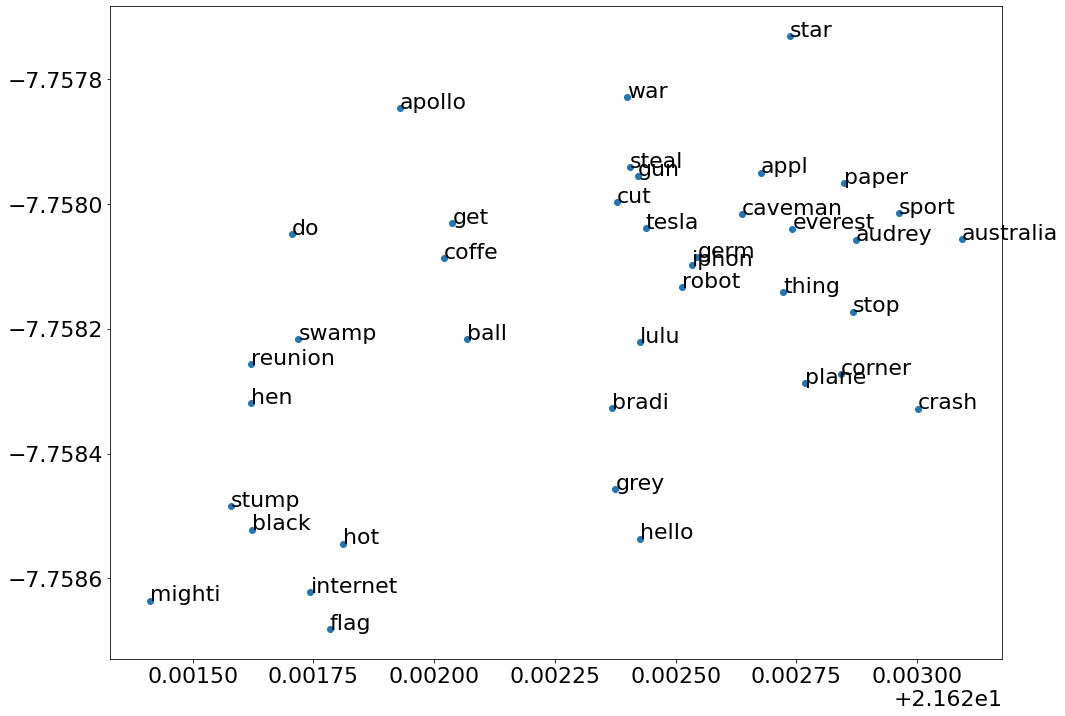

In [151]:

fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(brady_tsne[:len(lexicon),0], brady_tsne[:len(lexicon),1])

for i, txt in enumerate(lexicon):
    ax.annotate(txt, (brady_tsne[i,0], brady_tsne[i,1]))

In [153]:
bigger_lexicon = lexicon + list(grey_w2v.wv.vocab.keys())[:2000]

grey_matrix = np.zeros((len(bigger_lexicon), 300))

for i, w in enumerate(lexicon):
    grey_matrix[i,:] = grey_w2v.wv[w]
    

In [154]:
grey_tsne = tsne.fit_transform(grey_matrix)

## Grey TSNE

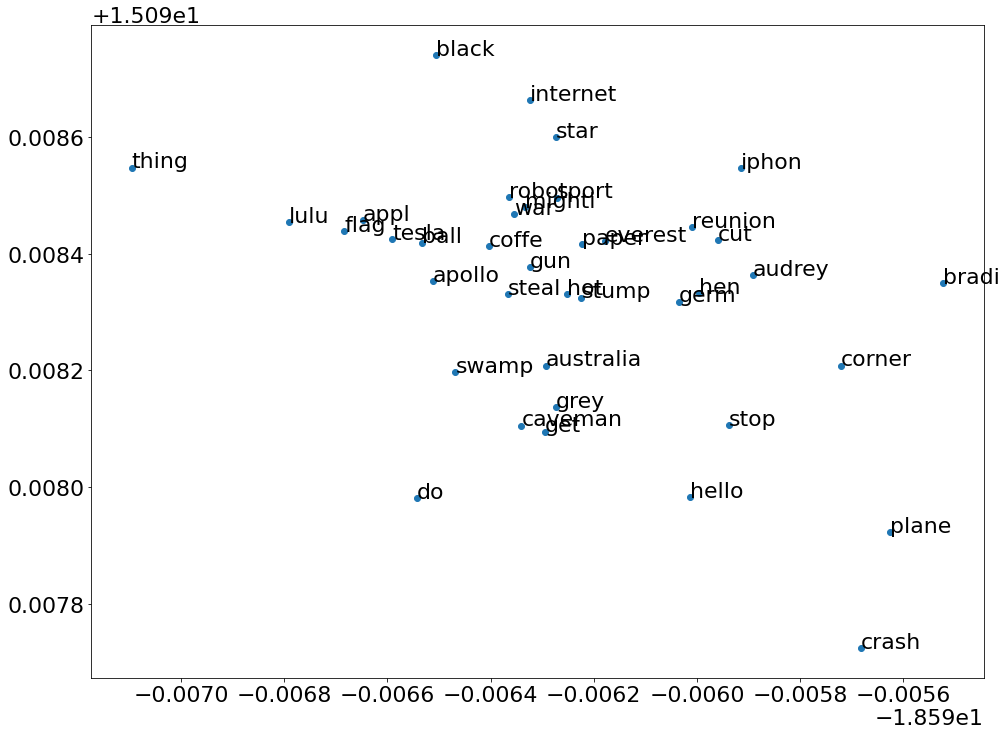

In [155]:

fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(grey_tsne[:len(lexicon),0], grey_tsne[:len(lexicon),1])

for i, txt in enumerate(lexicon):
    ax.annotate(txt, (grey_tsne[i,0], grey_tsne[i,1]))